# new

In [1]:
import requests
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings;

from sklearn.model_selection import train_test_split
from sklearn import metrics

warnings.simplefilter('ignore')
sns.set_style("white")


## Dictionary 
dts = the date they took the sample

tms = the time they took the sample

ind = the time of the day according to tms (00:00-01:00 means 1)

etype = Energy resource type ????

dr = 1 - A+, 2 - A-, 3 - R+, 4 - R-



### Data from the company

In [2]:
df = pd.read_csv('data.csv')
print("Columns: ", end="")
print(*df.columns, sep=", ")
df

Columns: dts, tms, namefider, real_val2, idfiders, dt, ind, dr, cnt_koef, rcode, val_pokaz, val, color, val_lim, sortnum, etype, real_val, loss, endTime, beginTime, date


,dts,tms,namefider,real_val2,idfiders,dt,ind,dr,cnt_koef,rcode,...,val,color,val_lim,sortnum,etype,real_val,loss,endTime,beginTime,date
0,08.01.2020,00:00-01:00,Ввод №2 Генерация,0.0000,3,2020-01-08T00:00:00,1,2,1,100,...,0.000000,-8323073,NaN,3,1,0.0000,0.0,NaN,NaN,08.01.2020
1,08.01.2020,00:00-01:00,Ввод №1 Потребление,0.0000,2,2020-01-08T00:00:00,1,2,1,100,...,0.000000,-8323073,NaN,2,1,0.0000,0.0,NaN,NaN,08.01.2020
2,08.01.2020,00:00-01:00,Ввод №1 Потребление,0.0000,2,2020-01-08T00:00:00,1,3,1,100,...,0.000000,-8323073,NaN,2,1,0.0000,0.0,NaN,NaN,08.01.2020
3,08.01.2020,00:00-01:00,Ввод №1 Генерация,0.0120,1,2020-01-08T00:00:00,1,4,1,100,...,0.000002,-8323073,NaN,1,1,0.0120,0.0,NaN,NaN,08.01.2020
4,08.01.2020,00:00-01:00,Ввод №1 Генерация,0.0000,1,2020-01-08T00:00:00,1,3,1,100,...,0.000000,-8323073,NaN,1,1,0.0000,0.0,NaN,NaN,08.01.2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291055,30.03.2020,23:00-24:00,Ввод 10 кВ,0.0225,21,2020-03-30T23:00:00,24,3,1,100,...,0.000015,-8323073,NaN,15,1,0.0225,0.0,NaN,30.03.2020,NaN
1291056,30.03.2020,23:00-24:00,Ввод 10 кВ,0.0000,21,2020-03-30T23:00:00,24,4,1,100,...,0.000000,-8323073,NaN,15,1,0.0000,0.0,NaN,30.03.2020,NaN
1291057,30.03.2020,23:00-24:00,Ком. 3,0.0000,5,2020-03-30T23:00:00,24,1,1,100,...,0.000000,-8323073,NaN,5,1,0.0000,0.0,NaN,30.03.2020,NaN
1291058,30.03.2020,23:00-24:00,Власні потреби,NaN,14,2020-03-30T23:00:00,24,3,1,202,...,NaN,-8323073,NaN,14,1,NaN,NaN,NaN,30.03.2020,NaN


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291060 entries, 0 to 1291059
Data columns (total 21 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   dts        1291060 non-null  object 
 1   tms        1291060 non-null  object 
 2   namefider  1291060 non-null  object 
 3   real_val2  1009063 non-null  float64
 4   idfiders   1291060 non-null  int64  
 5   dt         1291060 non-null  object 
 6   ind        1291060 non-null  int64  
 7   dr         1291060 non-null  int64  
 8   cnt_koef   1291060 non-null  int64  
 9   rcode      1291060 non-null  int64  
 10  val_pokaz  863436 non-null   float64
 11  val        1009063 non-null  float64
 12  color      1291060 non-null  int64  
 13  val_lim    0 non-null        float64
 14  sortnum    1291060 non-null  int64  
 15  etype      1291060 non-null  int64  
 16  real_val   1009063 non-null  float64
 17  loss       1009063 non-null  float64
 18  endTime    380256 non-null   object 
 19  

In [4]:
columns_to_drop = ["val_lim", "endTime", "beginTime", "date", "val_pokaz", "color", "loss", "real_val2", "dt",
                   "cnt_koef", "etype", "rcode", "sortnum", "namefider", 'val']
new_df = df.drop(columns_to_drop, axis=1)
new_df = new_df.dropna(subset=["real_val"])
new_df = new_df[(new_df['idfiders'] == 1) | (new_df['idfiders'] == 3)]
new_df['time'] = new_df['tms'].apply(lambda x: x.split('-')[0])
new_df

,dts,tms,idfiders,ind,dr,real_val,time
0,08.01.2020,00:00-01:00,3,1,2,0.000,00:00
3,08.01.2020,00:00-01:00,1,1,4,0.012,00:00
4,08.01.2020,00:00-01:00,1,1,3,0.000,00:00
6,08.01.2020,00:00-01:00,1,1,2,0.000,00:00
16,08.01.2020,00:00-01:00,3,1,4,0.000,00:00
...,...,...,...,...,...,...,...
1291010,30.03.2020,23:00-24:00,1,24,3,0.000,23:00
1291024,30.03.2020,23:00-24:00,1,24,4,0.012,23:00
1291042,30.03.2020,23:00-24:00,1,24,2,0.000,23:00
1291043,30.03.2020,23:00-24:00,3,24,3,0.004,23:00


### weather data

In [5]:
weather_df = pd.read_csv('weather_data.csv')


def add_leading_zeros(df, colname):
    df[colname] = df[colname].astype(str).str.zfill(2)


add_leading_zeros(weather_df, 'day')
add_leading_zeros(weather_df, 'month')
add_leading_zeros(weather_df, 'year')
cols = ["day", "month", "year"]
weather_df['dts'] = weather_df[cols].apply(lambda x: '.'.join(x.values.astype(str)), axis="columns")
weather_df

,year,month,day,time,temp,weather,wind_dir,wind_speed,humidity,dts
0,2019,01,01,02:00,-5,Overcast.,South,0,87,01.01.2019
1,2019,01,01,05:00,-6,Overcast.,South-southwest,2,89,01.01.2019
2,2019,01,01,08:00,-8,Fog.,South,2,93,01.01.2019
3,2019,01,01,11:00,-7,Fog.,South,0,90,01.01.2019
4,2019,01,01,14:00,-7,Overcast.,North,4,90,01.01.2019
...,...,...,...,...,...,...,...,...,...,...
7996,2021,12,31,08:00,-4,Overcast.,South,0,92,31.12.2021
7997,2021,12,31,11:00,-2,Overcast.,East,4,85,31.12.2021
7998,2021,12,31,17:00,-3,Overcast.,South,0,89,31.12.2021
7999,2021,12,31,20:00,-3,Overcast.,South,0,91,31.12.2021


In [6]:
print(weather_df.describe())
print(weather_df.info())

              temp   wind_speed     humidity
count  8001.000000  8001.000000  8001.000000
mean     10.353706     3.096488    70.556055
std      10.905876     3.444189    22.168066
min     -29.000000     0.000000    11.000000
25%       2.000000     0.000000    54.000000
50%      10.000000     4.000000    77.000000
75%      19.000000     4.000000    90.000000
max      38.000000   180.000000   100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        8001 non-null   object
 1   month       8001 non-null   object
 2   day         8001 non-null   object
 3   time        8001 non-null   object
 4   temp        8001 non-null   int64 
 5   weather     8001 non-null   object
 6   wind_dir    8001 non-null   object
 7   wind_speed  8001 non-null   int64 
 8   humidity    8001 non-null   int64 
 9   dts         8001 non-null   object
dtypes: 

We want to do hot-encoding. 

For wind_dir there are 16 categories so we used the regular way to do it.

In weather there were a few categories but each row could have more then one category. We made a new column for each category and if the category applied to the row we put one, else we put 0.

In [7]:
weather_df = weather_df.copy()

weather_df['wind_dir'] = weather_df['wind_dir'].astype('category')
weather_df['wind_dir_cat'] = weather_df['wind_dir'].cat.codes
weather_df['wind_dir_categories'] = weather_df['wind_dir_cat']
weather_df = pd.get_dummies(weather_df, columns=["wind_dir_cat"], prefix=["wind_dir"])
#-----------------------------------------------------------------------------------------------#
weather_df['weather'] = weather_df['weather'].astype('category')
weather_df['weather_cat'] = weather_df['weather'].cat.codes
weather_df['weather_categories'] = weather_df['weather_cat']
weather_df = pd.get_dummies(weather_df, columns=["weather_cat"], prefix=["weather"])
#weather_cat = [x.strip() for x in ''.join(weather_df['weather'].unique()).split('.')]
#weather_cat.remove("")
#weather_cat = list(set(weather_cat))
#
#for cat in weather_cat:
#    weather_df[cat] = weather_df['weather'].str.contains(cat, False)
#    weather_df[cat] = weather_df[cat].astype(int)

#weather_df = weather_df.drop(['weather', 'wind_dir'], axis=1)
weather_df

,year,month,day,time,temp,weather,wind_dir,wind_speed,humidity,dts,...,weather_25,weather_26,weather_27,weather_28,weather_29,weather_30,weather_31,weather_32,weather_33,weather_34
0,2019,01,01,02:00,-5,Overcast.,South,0,87,01.01.2019,...,0,0,0,0,0,0,0,0,0,0
1,2019,01,01,05:00,-6,Overcast.,South-southwest,2,89,01.01.2019,...,0,0,0,0,0,0,0,0,0,0
2,2019,01,01,08:00,-8,Fog.,South,2,93,01.01.2019,...,0,0,0,0,0,0,0,0,0,0
3,2019,01,01,11:00,-7,Fog.,South,0,90,01.01.2019,...,0,0,0,0,0,0,0,0,0,0
4,2019,01,01,14:00,-7,Overcast.,North,4,90,01.01.2019,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,2021,12,31,08:00,-4,Overcast.,South,0,92,31.12.2021,...,0,0,0,0,0,0,0,0,0,0
7997,2021,12,31,11:00,-2,Overcast.,East,4,85,31.12.2021,...,0,0,0,0,0,0,0,0,0,0
7998,2021,12,31,17:00,-3,Overcast.,South,0,89,31.12.2021,...,0,0,0,0,0,0,0,0,0,0
7999,2021,12,31,20:00,-3,Overcast.,South,0,91,31.12.2021,...,0,0,0,0,0,0,0,0,0,0


### Combine two dataframes

In [8]:
ndf = new_df.copy()
ndf = pd.merge(new_df, weather_df, how='left', on=['dts', 'time'])
ndf = ndf.drop(['year', 'month', 'day', 'tms'], axis=1)
ndf = ndf.sort_values(by=['dts', 'ind']).reset_index(drop=True)
ndf['dts'] = pd.to_datetime(ndf['dts'])
ndf

,dts,idfiders,ind,dr,real_val,time,temp,weather,wind_dir,wind_speed,...,weather_25,weather_26,weather_27,weather_28,weather_29,weather_30,weather_31,weather_32,weather_33,weather_34
0,2020-01-01,1,1,3,0.0000,00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,3,1,3,0.0022,00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,1,1,1,0.0033,00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,3,1,4,0.0000,00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,3,1,2,0.0000,00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140483,2021-12-31,1,24,2,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140484,2021-12-31,3,24,2,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140485,2021-12-31,1,24,4,0.0120,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140486,2021-12-31,1,24,3,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


-----------------------------------------------------------


A lot of missing data from the weather section

In [9]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140488 entries, 0 to 140487
Data columns (total 64 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dts                  140488 non-null  datetime64[ns]
 1   idfiders             140488 non-null  int64         
 2   ind                  140488 non-null  int64         
 3   dr                   140488 non-null  int64         
 4   real_val             140488 non-null  float64       
 5   time                 140488 non-null  object        
 6   temp                 42344 non-null   float64       
 7   weather              42344 non-null   category      
 8   wind_dir             42344 non-null   category      
 9   wind_speed           42344 non-null   float64       
 10  humidity             42344 non-null   float64       
 11  wind_dir_categories  42344 non-null   float64       
 12  wind_dir_0           42344 non-null   float64       
 13  wind_dir_1    

-------------------------------------------------
To fill the data we will use the fillna() function with the method 'bfill' that will fill the missing data according to the closest data. We sorted the data according to the date and time so it's reasonable that if at 2:00 it was 3 degrees, at 3:00 it will be close to 3 degrees.

In [10]:
ndf = ndf.fillna(method='bfill')
ndf

,dts,idfiders,ind,dr,real_val,time,temp,weather,wind_dir,wind_speed,...,weather_25,weather_26,weather_27,weather_28,weather_29,weather_30,weather_31,weather_32,weather_33,weather_34
0,2020-01-01,1,1,3,0.0000,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,3,1,3,0.0022,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-01,1,1,1,0.0033,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-01,3,1,4,0.0000,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-01,3,1,2,0.0000,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140483,2021-12-31,1,24,2,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140484,2021-12-31,3,24,2,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140485,2021-12-31,1,24,4,0.0120,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140486,2021-12-31,1,24,3,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No missing values now

In [11]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140488 entries, 0 to 140487
Data columns (total 64 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dts                  140488 non-null  datetime64[ns]
 1   idfiders             140488 non-null  int64         
 2   ind                  140488 non-null  int64         
 3   dr                   140488 non-null  int64         
 4   real_val             140488 non-null  float64       
 5   time                 140488 non-null  object        
 6   temp                 140488 non-null  float64       
 7   weather              140488 non-null  category      
 8   wind_dir             140488 non-null  category      
 9   wind_speed           140488 non-null  float64       
 10  humidity             140488 non-null  float64       
 11  wind_dir_categories  140488 non-null  float64       
 12  wind_dir_0           140488 non-null  float64       
 13  wind_dir_1    

# Data handling

In [12]:
def split_to_bins(label, df, bins=20):
    #labels = list(range(0, bins))
    df[f'{label}_bin'] = pd.qcut(df[label], bins, labels=False, duplicates='drop')
    pd.pivot_table(df, index=[f'{label}_bin'], values=[label])
    return df


def split_to_bins_get_pivot(labels, df, bins=20, aggfunc=None, exclude=None, include_binning=None):
    if include_binning is None:
        include_binning = {}
    if exclude is None:
        exclude = []
    if type(labels) != list:
        labels = [labels]
    bin_df = df.copy()
    results = {}
    for label in labels:
        if label not in exclude:
            try:
                if aggfunc is None:
                    aggfunc = [np.mean]
                bin_df = df
                bin_label = label
                values = ['real_val']
                if bins > 0 and label in include_binning:
                    bin_df = split_to_bins(label, bin_df, bins)
                    bin_label = f'{label}_bin'
                    values = [label, 'real_val']

                results[label] = pd.pivot_table(bin_df, index=[bin_label], values=values,
                                               aggfunc={label: aggfunc, 'real_val': np.mean})
            except Exception as e:
                print(f"label {label} raised an error")
                raise e
    return results, bin_df



In [13]:
ndf

,dts,idfiders,ind,dr,real_val,time,temp,weather,wind_dir,wind_speed,...,weather_25,weather_26,weather_27,weather_28,weather_29,weather_30,weather_31,weather_32,weather_33,weather_34
0,2020-01-01,1,1,3,0.0000,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,3,1,3,0.0022,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-01,1,1,1,0.0033,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-01,3,1,4,0.0000,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-01,3,1,2,0.0000,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140483,2021-12-31,1,24,2,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140484,2021-12-31,3,24,2,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140485,2021-12-31,1,24,4,0.0120,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140486,2021-12-31,1,24,3,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
ndf.describe()

,idfiders,ind,dr,real_val,temp,wind_speed,humidity,wind_dir_categories,wind_dir_0,wind_dir_1,...,weather_25,weather_26,weather_27,weather_28,weather_29,weather_30,weather_31,weather_32,weather_33,weather_34
count,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,...,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000
mean,1.999829,12.500342,2.500000,0.162917,10.021496,3.181937,70.652041,7.518080,0.077615,0.033085,...,0.004783,0.016172,0.001367,0.000342,0.075850,0.004783,0.000171,0.001708,0.001879,0.001025
std,1.000004,6.922835,1.118038,0.600346,11.021208,2.833835,21.928940,3.980502,0.267566,0.178858,...,0.068996,0.126138,0.036943,0.018481,0.264759,0.068996,0.013069,0.041297,0.043309,0.031999
min,1.000000,1.000000,1.000000,0.000000,-29.000000,0.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.000000,1.750000,0.000000,1.000000,0.000000,54.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12.000000,2.500000,0.000000,10.000000,4.000000,77.000000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,19.000000,3.250000,0.012000,18.000000,6.000000,90.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,24.000000,4.000000,4.926000,38.000000,19.000000,100.000000,15.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
ndf['dr'] = ndf['dr'].astype('category')
ndf['dr_cat'] = ndf['dr'].cat.codes
ndf = pd.get_dummies(ndf, columns=["dr_cat"], prefix=["dr"])

ndf['idfiders'] = ndf['idfiders'].astype('category')
ndf['idfiders_cat'] = ndf['idfiders'].cat.codes
ndf = pd.get_dummies(ndf, columns=["idfiders_cat"], prefix=["idfiders"])
ndf

,dts,idfiders,ind,dr,real_val,time,temp,weather,wind_dir,wind_speed,...,weather_31,weather_32,weather_33,weather_34,dr_0,dr_1,dr_2,dr_3,idfiders_0,idfiders_1
0,2020-01-01,1,1,3,0.0000,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,1,0
1,2020-01-01,3,1,3,0.0022,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
2,2020-01-01,1,1,1,0.0033,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
3,2020-01-01,3,1,4,0.0000,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1
4,2020-01-01,3,1,2,0.0000,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140483,2021-12-31,1,24,2,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0
140484,2021-12-31,3,24,2,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,1
140485,2021-12-31,1,24,4,0.0120,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,1,0
140486,2021-12-31,1,24,3,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,1,0


### Graphs

Most of the data in real_val is smaller then 1

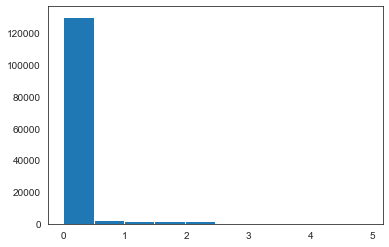

In [16]:
plt.hist(ndf['real_val'], bins=10)
plt.show()

Real_val over a year 

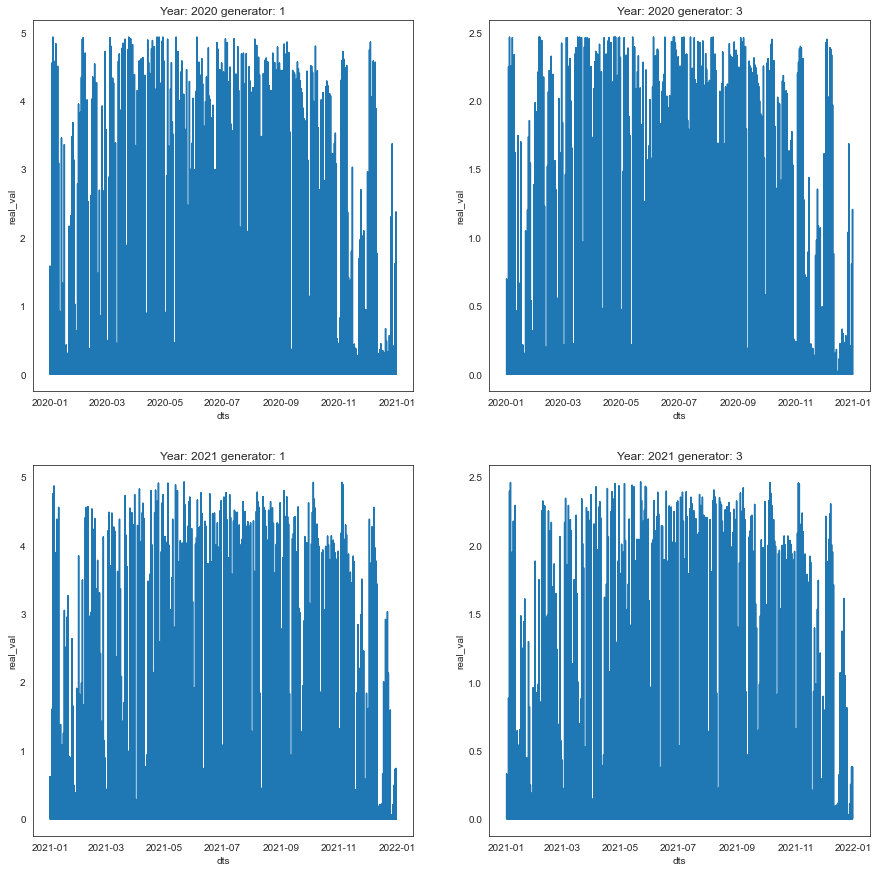

In [17]:
years = [2020, 2021]
generators = [1, 3]
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
for i in range(2):
    for j in range(2):
        temp_df = ndf[(years[i] == ndf['dts'].dt.year) & (ndf['idfiders'] == generators[j])]
        ax[i, j].set_title("Year: " + str(years[i]) + " generator: " + str(generators[j]))
        ax[i, j].set(xlabel='dts', ylabel='real_val')
        ax[i, j].plot(temp_df['dts'], temp_df['real_val']);
plt.show()

Year: 2020 
generator: 1


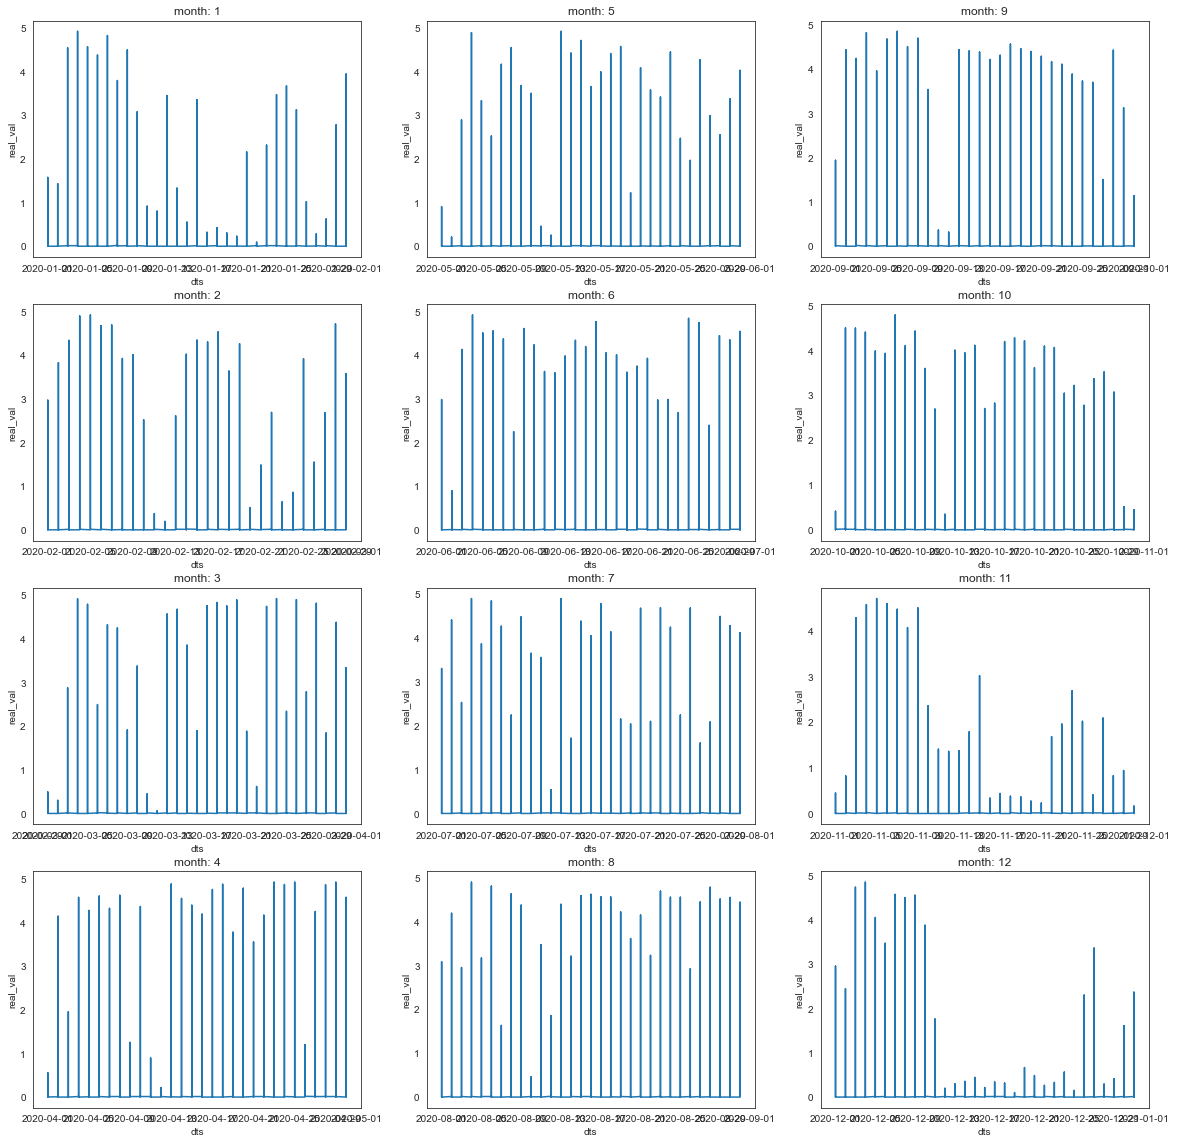

In [18]:
count = 1
year = 2020
generator = 1

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
print("Year:", year, "\ngenerator:", generator)
for i in range(3):
    for j in range(4):
        temp_df = ndf[(year == ndf['dts'].dt.year) & (count == ndf['dts'].dt.month) & (ndf['idfiders'] == generator)]
        ax[j, i].set_title("month: " + str(count))
        ax[j, i].set(xlabel='dts', ylabel='real_val')
        ax[j, i].plot(temp_df['dts'], temp_df['real_val']);
        count += 1
plt.show()

Year: 2020 
generator: 3


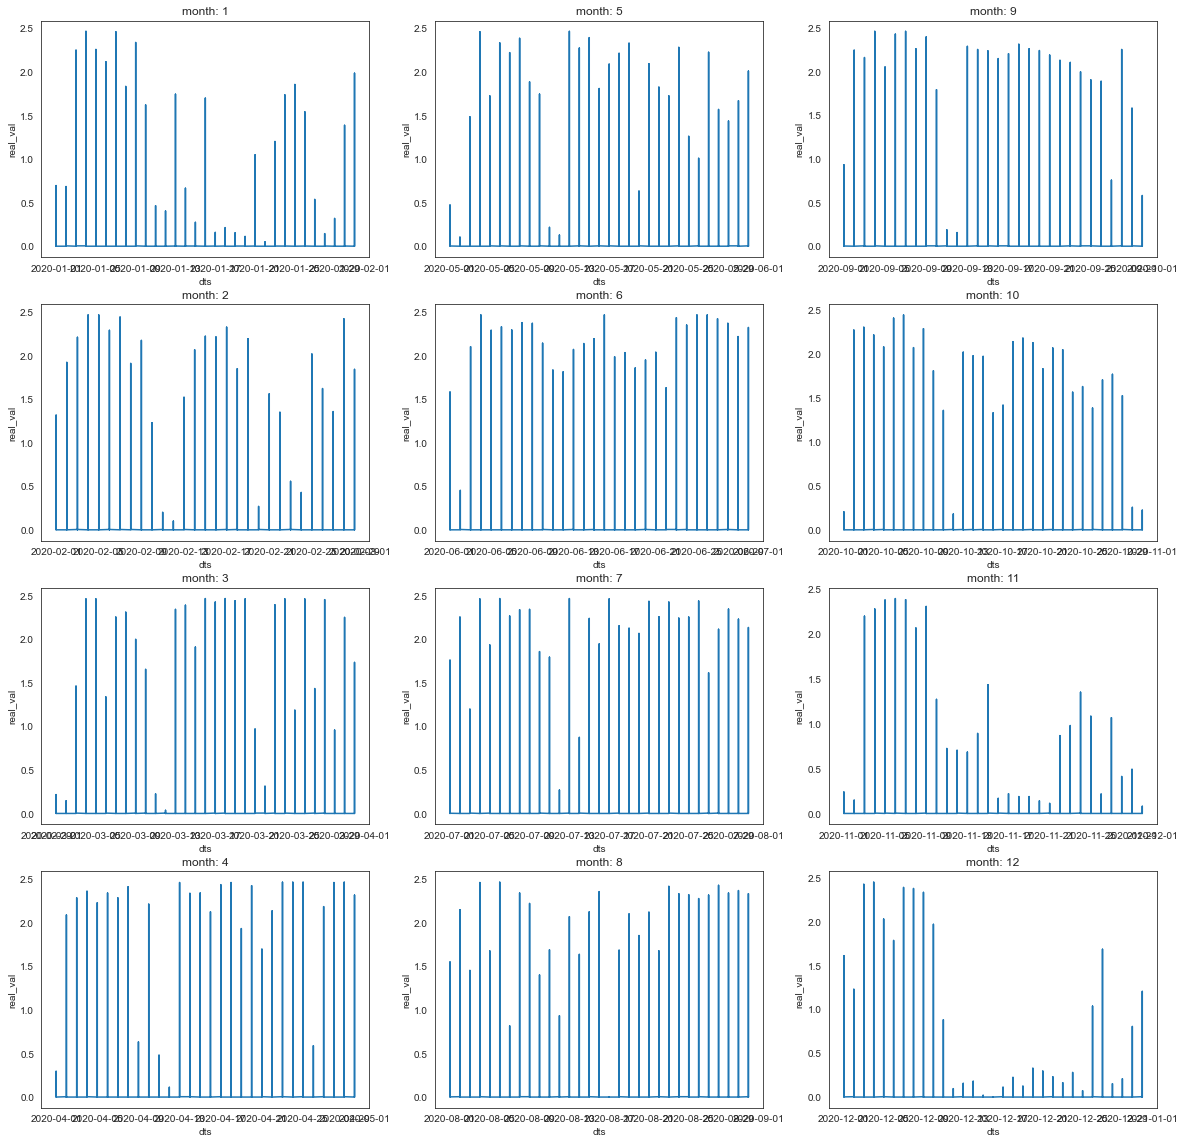

In [19]:
count = 1
year = 2020
generator = 3

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
print("Year:", year, "\ngenerator:", generator)
for i in range(3):
    for j in range(4):
        temp_df = ndf[(year == ndf['dts'].dt.year) & (count == ndf['dts'].dt.month) & (ndf['idfiders'] == generator)]
        ax[j, i].set_title("month: " + str(count))
        ax[j, i].set(xlabel='dts', ylabel='real_val')
        ax[j, i].plot(temp_df['dts'], temp_df['real_val']);
        count += 1
plt.show()

Year: 2021 
generator: 1


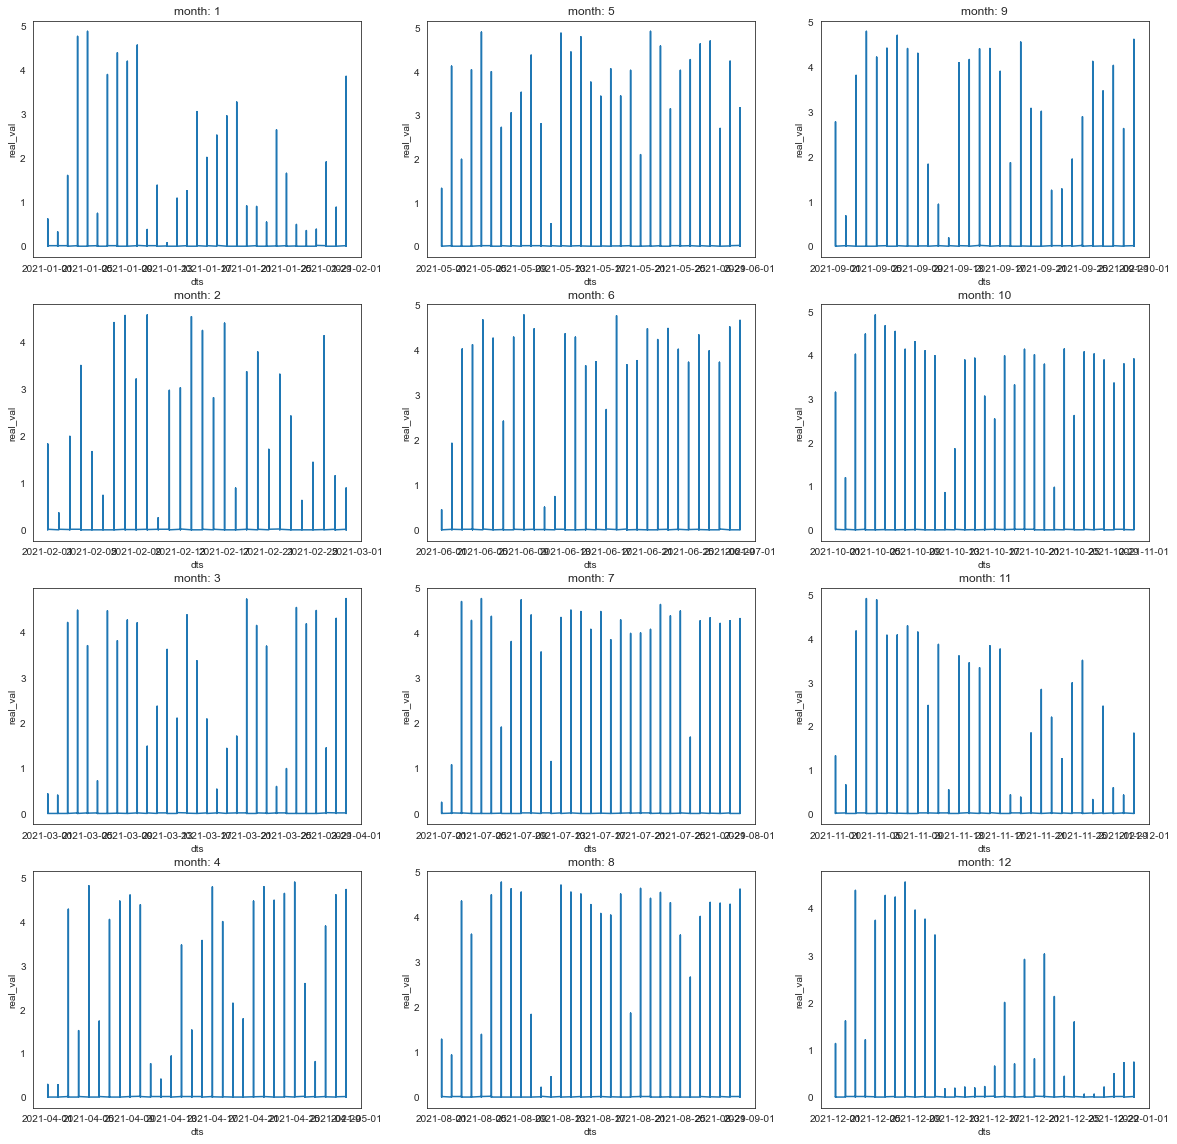

In [20]:
count = 1
year = 2021
generator = 1

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
print("Year:", year, "\ngenerator:", generator)
for i in range(3):
    for j in range(4):
        temp_df = ndf[(year == ndf['dts'].dt.year) & (count == ndf['dts'].dt.month) & (ndf['idfiders'] == generator)]
        ax[j, i].set_title("month: " + str(count))
        ax[j, i].set(xlabel='dts', ylabel='real_val')
        ax[j, i].plot(temp_df['dts'], temp_df['real_val']);
        count += 1
plt.show()

Year: 2021 
generator: 3


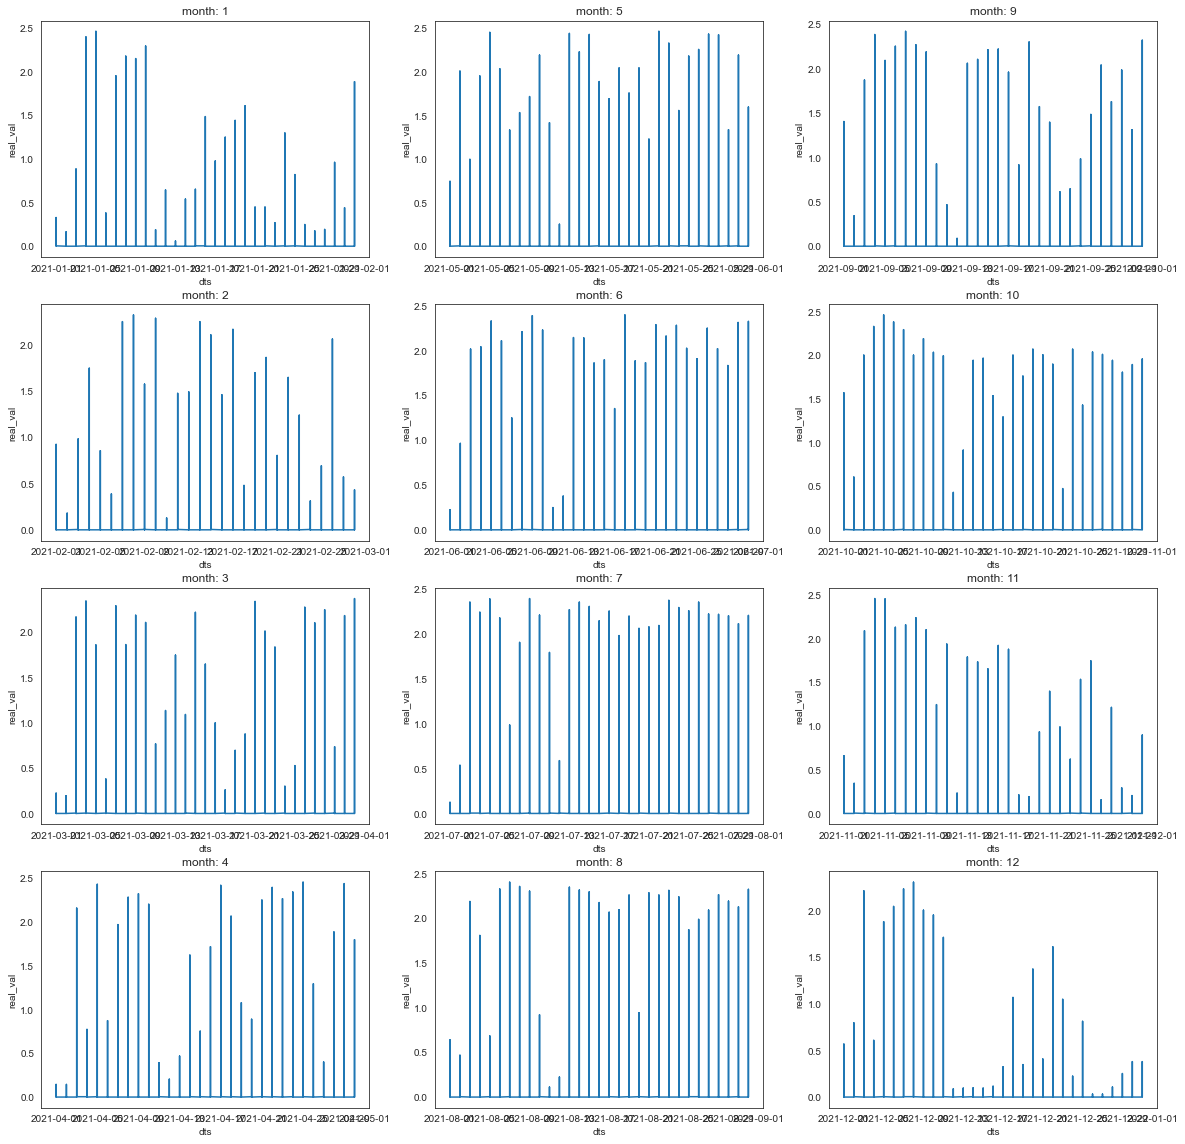

In [21]:
count = 1
year = 2021
generator = 3

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
print("Year:", year, "\ngenerator:", generator)
for i in range(3):
    for j in range(4):
        temp_df = ndf[(year == ndf['dts'].dt.year) & (count == ndf['dts'].dt.month) & (ndf['idfiders'] == generator)]
        ax[j, i].set_title("month: " + str(count))
        ax[j, i].set(xlabel='dts', ylabel='real_val')
        ax[j, i].plot(temp_df['dts'], temp_df['real_val']);
        count += 1
plt.show()

We want to see how the real_val values distribute according to an hour.

Distribution by hour:


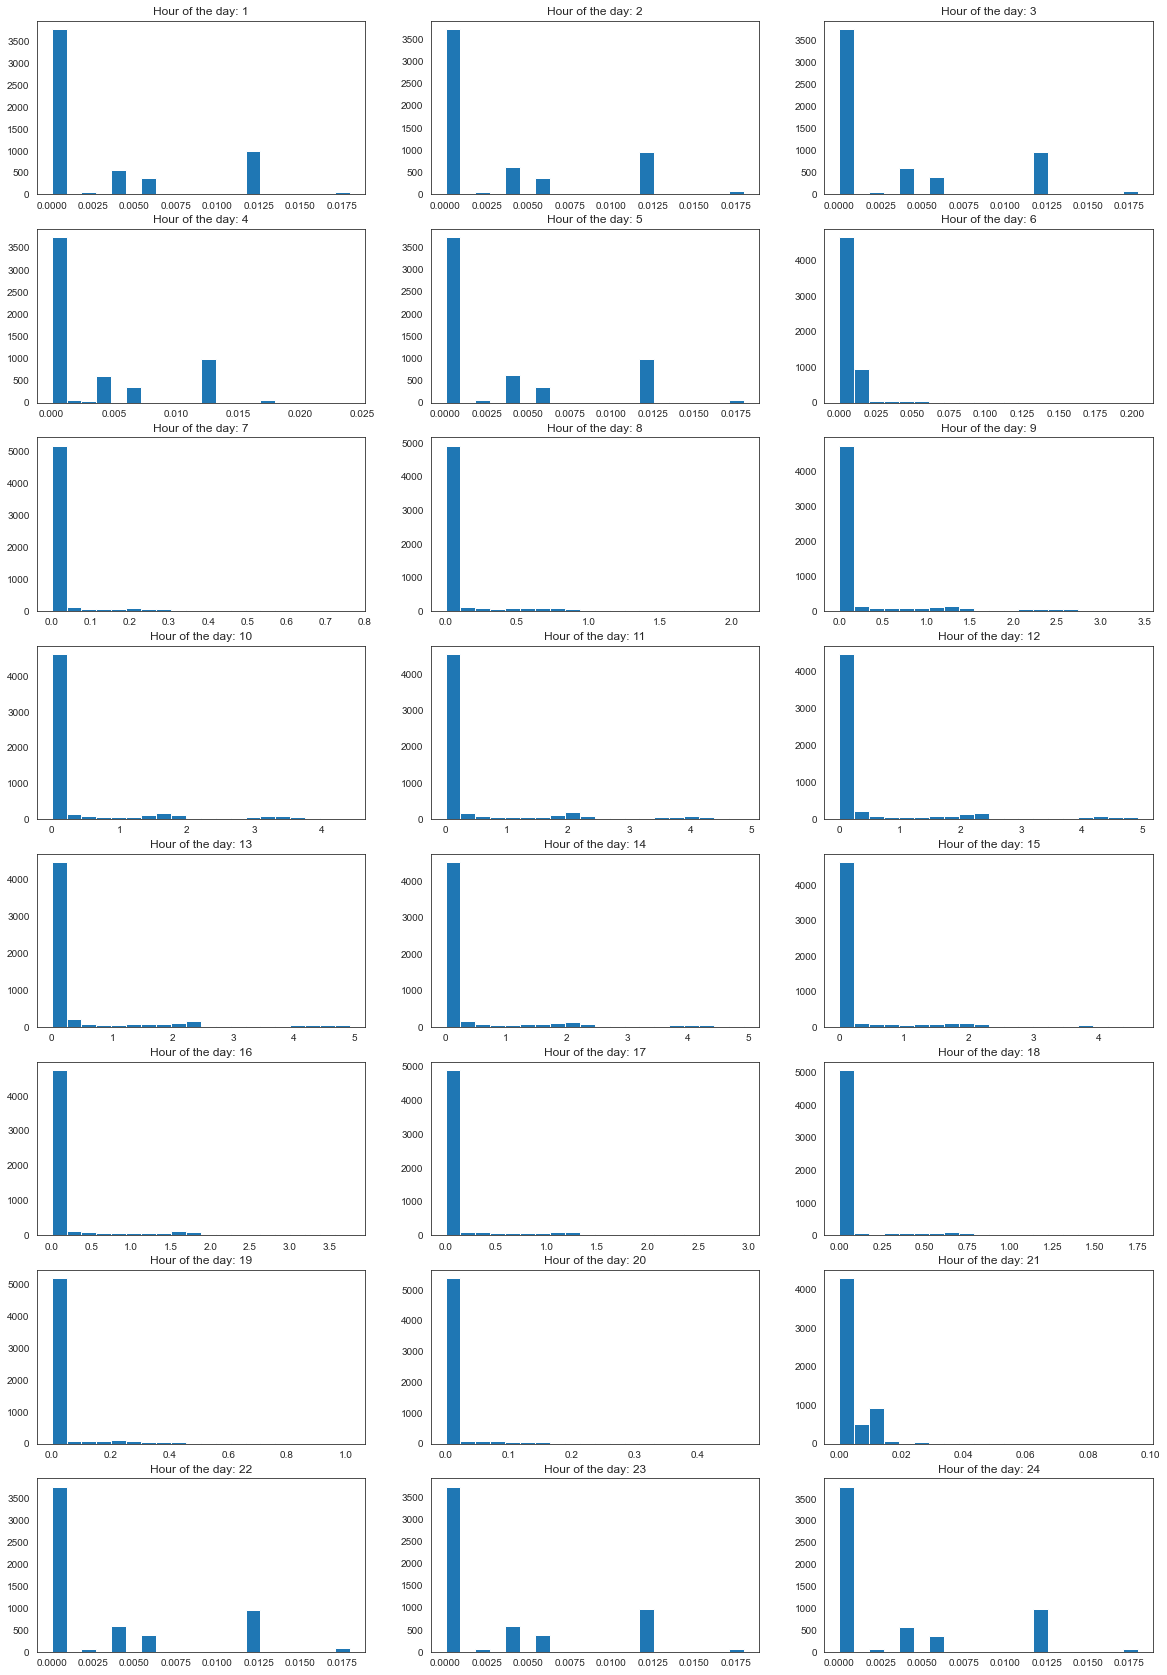

In [22]:
count = 1
fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(20, 30))
print("Distribution by hour:")
for i in range(8):
    for j in range(3):
        temp_df = ndf[(year == ndf['dts'].dt.year) & (count == ndf['dts'].dt.month) & (ndf['idfiders'] == generator)]
        ax[i, j].set_title("Hour of the day: " + str(count))
        ax[i, j].hist(ndf[ndf['ind'] == count]['real_val'], bins=20);
        count += 1
plt.show()

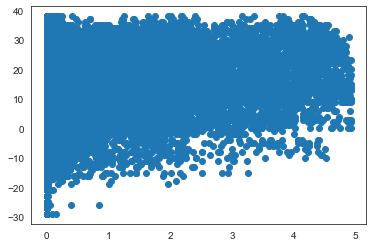

In [23]:
plt.scatter(ndf['real_val'], ndf['temp'])

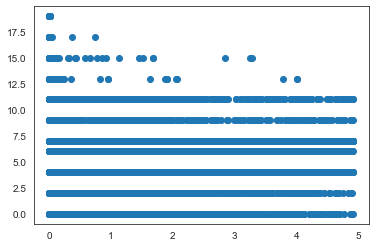

In [24]:
plt.scatter(ndf['real_val'], ndf['wind_speed'])

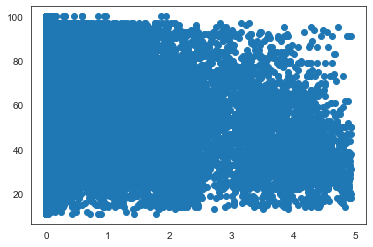

In [25]:
plt.scatter(ndf['real_val'], ndf['humidity'])

In [26]:
ndf_graphs = ndf.copy()
ndf_graphs['wind_dir_0'] = ndf_graphs['wind_dir_0'].astype(int)
ndf_graphs

,dts,idfiders,ind,dr,real_val,time,temp,weather,wind_dir,wind_speed,...,weather_31,weather_32,weather_33,weather_34,dr_0,dr_1,dr_2,dr_3,idfiders_0,idfiders_1
0,2020-01-01,1,1,3,0.0000,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,1,0
1,2020-01-01,3,1,3,0.0022,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
2,2020-01-01,1,1,1,0.0033,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
3,2020-01-01,3,1,4,0.0000,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1
4,2020-01-01,3,1,2,0.0000,00:00,0.0,Light snow. Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140483,2021-12-31,1,24,2,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,1,0
140484,2021-12-31,3,24,2,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,1
140485,2021-12-31,1,24,4,0.0120,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,0,0,1,1,0
140486,2021-12-31,1,24,3,0.0000,23:00,-3.0,Overcast.,South,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,1,0


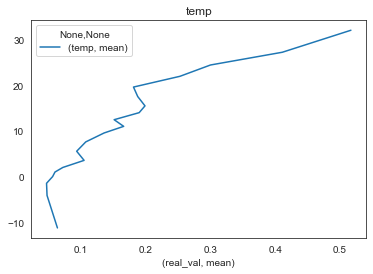

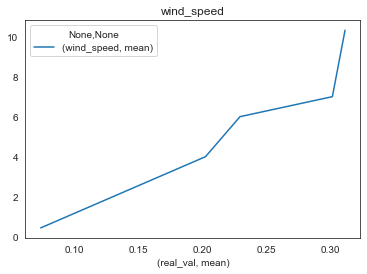

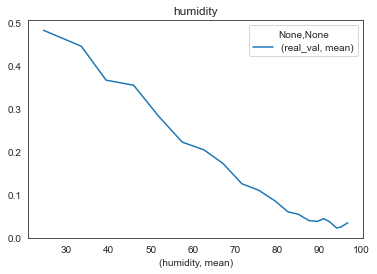

In [27]:

results, ndf_binned = split_to_bins_get_pivot(['temp', 'wind_speed', 'humidity'], ndf_graphs, bins=20, include_binning=['temp', 'wind_speed', 'humidity'])
for label in results:
    ax = results[label].plot.line(x=0, y=1)
    ax.set_title(label)

density weather parameters:


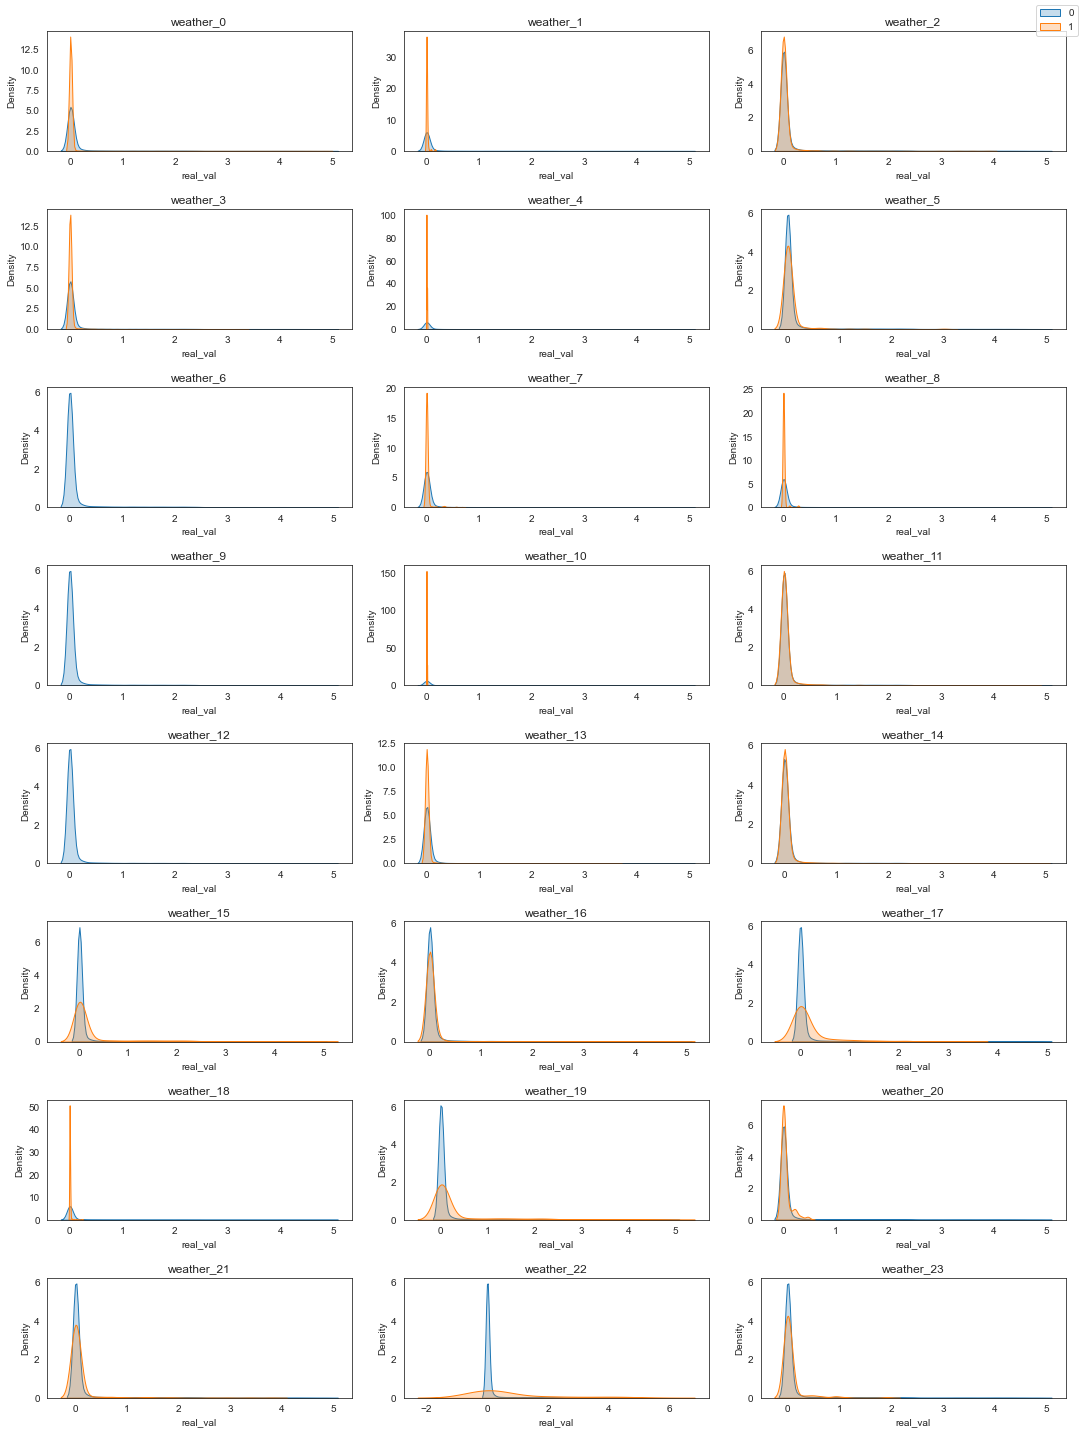

In [28]:
weather_cat = ['weather_0', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'weather_5',
               'weather_6', 'weather_7', 'weather_8', 'weather_9', 'weather_10',
               'weather_11', 'weather_12', 'weather_13', 'weather_14', 'weather_15',
               'weather_16', 'weather_17', 'weather_18', 'weather_19', 'weather_20',
               'weather_21', 'weather_22', 'weather_23', 'weather_24', 'weather_25',
               'weather_26', 'weather_27', 'weather_28', 'weather_29', 'weather_30',
               'weather_31', 'weather_32', 'weather_33', 'weather_34']
print("density weather parameters:")
count = 0
fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(15, 20))
for i in range(8):
    for j in range(3):
        ax[i, j].set_title(weather_cat[count])
        sns.distplot(ndf[ndf[weather_cat[count]] == 0]['real_val'], hist=False, kde=True,
                     kde_kws={'shade': True, 'linewidth': 1}, label='0', ax=ax[i, j])
        sns.distplot(ndf[ndf[weather_cat[count]] == 1]['real_val'], hist=False, kde=True,
                     kde_kws={'shade': True, 'linewidth': 1}, label='1', ax=ax[i, j])
        count += 1
fig.tight_layout(pad=1.5)
fig.legend(labels=['0', '1'])
plt.show()

density wind parameters:


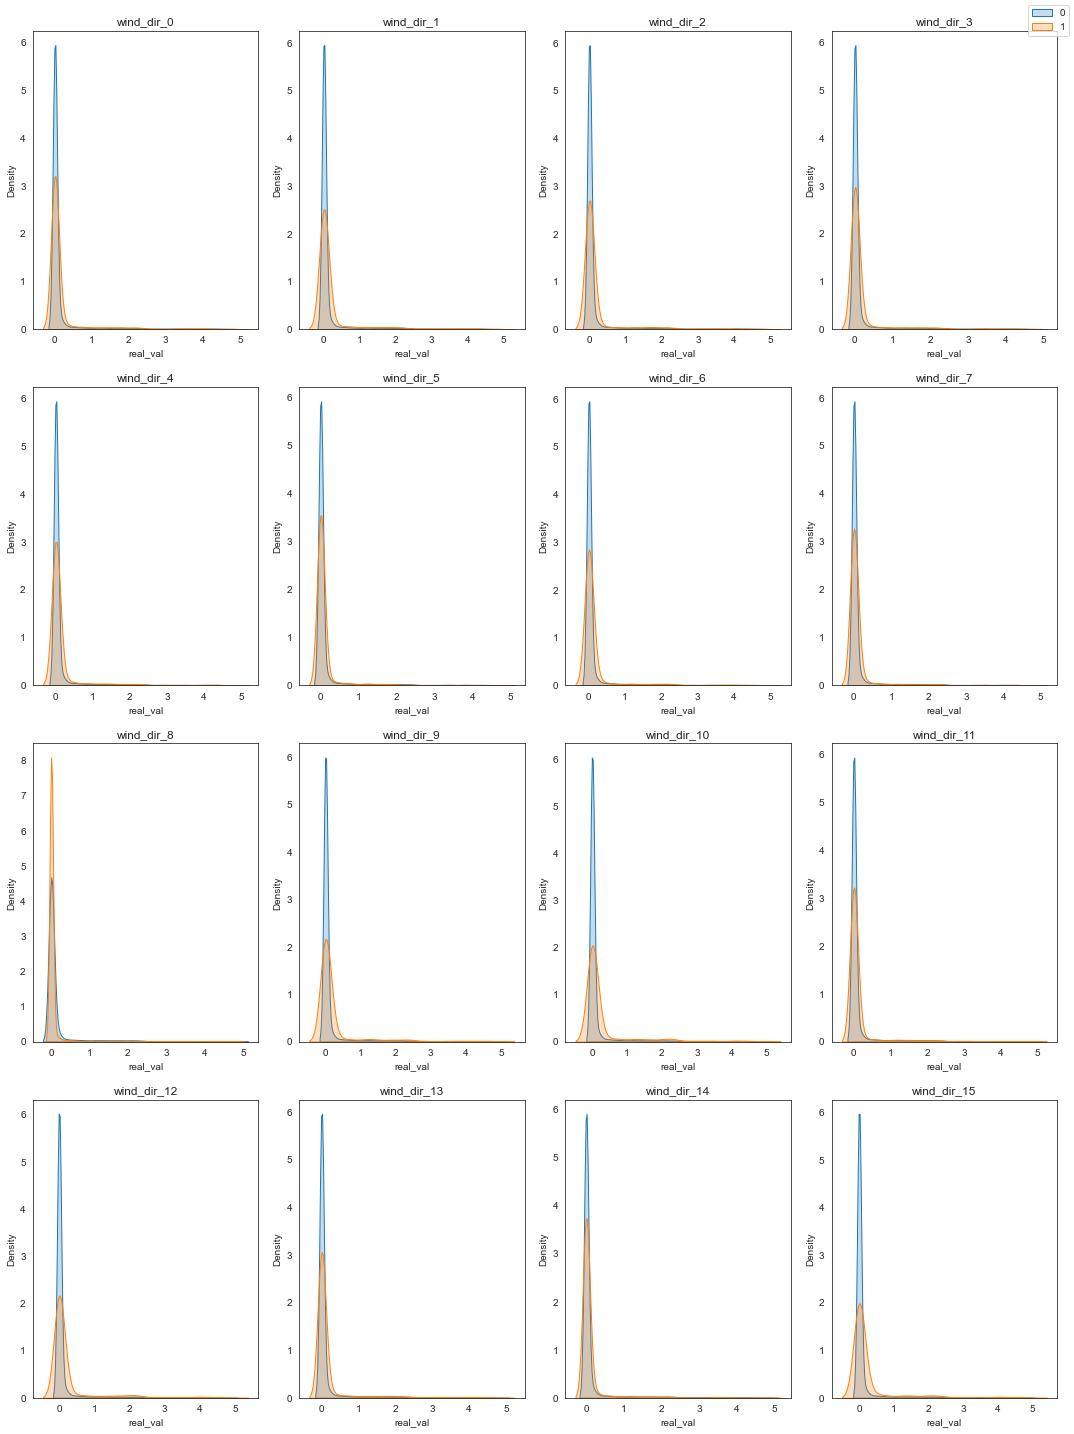

In [29]:
print("density wind parameters:")
count = 0
wind_dir_list = ['wind_dir_0', 'wind_dir_1', 'wind_dir_2', 'wind_dir_3', 'wind_dir_4', 'wind_dir_5', 'wind_dir_6',
                 'wind_dir_7',
                 'wind_dir_8', 'wind_dir_9', 'wind_dir_10', 'wind_dir_11', 'wind_dir_12', 'wind_dir_13', 'wind_dir_14',
                 'wind_dir_15']
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))
for i in range(4):
    for j in range(4):
        ax[i, j].set_title(wind_dir_list[count])
        sns.distplot(ndf[ndf[wind_dir_list[count]] == 0]['real_val'], hist=False, kde=True,
                     kde_kws={'shade': True, 'linewidth': 1}, label='0', ax=ax[i, j])
        sns.distplot(ndf[ndf[wind_dir_list[count]] == 1]['real_val'], hist=False, kde=True,
                     kde_kws={'shade': True, 'linewidth': 1}, label='1', ax=ax[i, j])
        count += 1
fig.tight_layout(pad=1.5)
fig.legend(labels=['0', '1'])
plt.show()

density dr parameters:


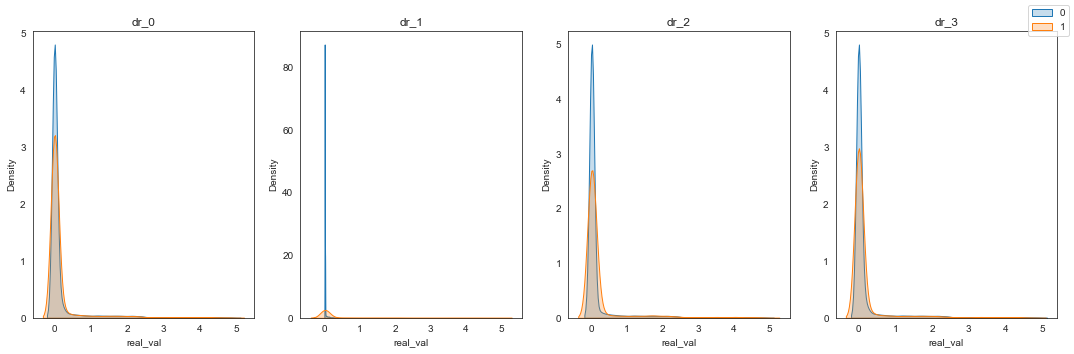

In [30]:
print("density dr parameters:")
count = 0
dr_list = ['dr_0', 'dr_1', 'dr_2', 'dr_3']
fig, ax = plt.subplots(ncols=4, figsize=(15, 5))
for j in range(4):
    ax[j].set_title(dr_list[count])
    sns.distplot(ndf[ndf[dr_list[count]] == 0]['real_val'], hist=False, kde=True,
                 kde_kws={'shade': True, 'linewidth': 1}, label='0', ax=ax[j])
    sns.distplot(ndf[ndf[wind_dir_list[count]] == 1]['real_val'], hist=False, kde=True,
                 kde_kws={'shade': True, 'linewidth': 1}, label='1', ax=ax[j])
    count += 1
fig.tight_layout(pad=1.5)
fig.legend(labels=['0', '1'])
plt.show()

density idfiders parameters:


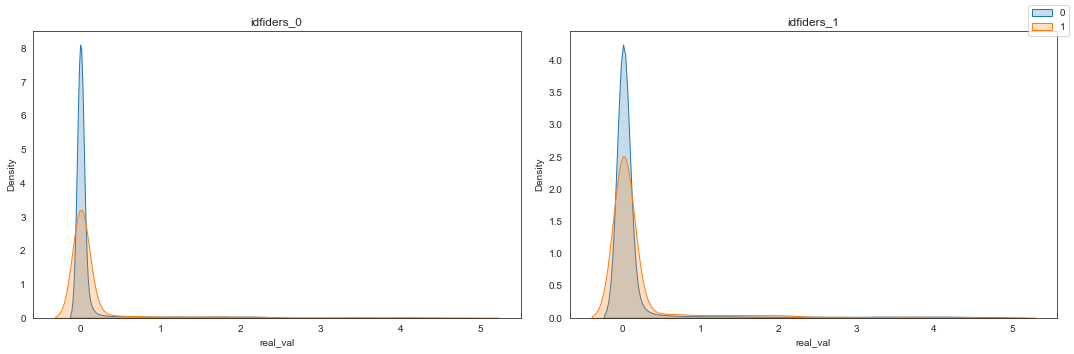

In [31]:
print("density idfiders parameters:")
count = 0
dr_list = ['idfiders_0', 'idfiders_1']
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
for j in range(2):
    ax[j].set_title(dr_list[count])
    sns.distplot(ndf[ndf[dr_list[count]] == 0]['real_val'], hist=False, kde=True,
                 kde_kws={'shade': True, 'linewidth': 1}, label='0', ax=ax[j])
    sns.distplot(ndf[ndf[wind_dir_list[count]] == 1]['real_val'], hist=False, kde=True,
                 kde_kws={'shade': True, 'linewidth': 1}, label='1', ax=ax[j])
    count += 1
fig.tight_layout(pad=1.5)
fig.legend(labels=['0', '1'])
plt.show()

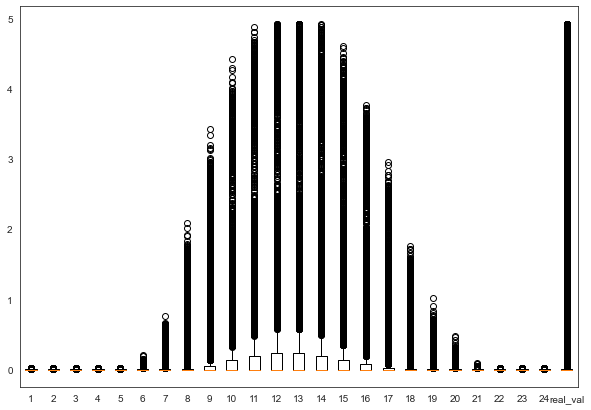

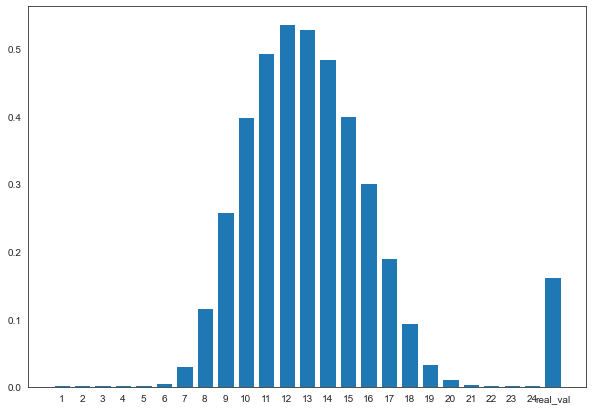

In [32]:
fig = plt.figure(figsize=(10,7))
plt.boxplot([ndf[ndf['ind']==1]['real_val'], ndf[ndf['ind']==2]['real_val'], 
             ndf[ndf['ind']==3]['real_val'], ndf[ndf['ind']==4]['real_val'], 
             ndf[ndf['ind']==5]['real_val'], ndf[ndf['ind']==6]['real_val'], 
             ndf[ndf['ind']==7]['real_val'], ndf[ndf['ind']==8]['real_val'], 
             ndf[ndf['ind']==9]['real_val'], ndf[ndf['ind']==10]['real_val'], 
             ndf[ndf['ind']==11]['real_val'], ndf[ndf['ind']==12]['real_val'], 
             ndf[ndf['ind']==13]['real_val'], ndf[ndf['ind']==14]['real_val'], 
             ndf[ndf['ind']==15]['real_val'], ndf[ndf['ind']==16]['real_val'], 
             ndf[ndf['ind']==17]['real_val'], ndf[ndf['ind']==18]['real_val'], 
             ndf[ndf['ind']==19]['real_val'], ndf[ndf['ind']==20]['real_val'], 
             ndf[ndf['ind']==21]['real_val'], ndf[ndf['ind']==22]['real_val'], 
             ndf[ndf['ind']==23]['real_val'], ndf[ndf['ind']==24]['real_val'], 
             ndf['real_val']], labels= ['1', '2', '3', '4', '5', '6', '7', '8', '9',
                                       '10', '11', '12', '13', '14', '15', '16', '17',
                                        '18', '19', '20', '21', '22', '23', '24', 'real_val'])
plt.show()

#----------------------------------------------------------------------------------------------------------------

fig = plt.figure(figsize=(10,7))
plt.bar(['1', '2', '3', '4', '5', '6', '7', '8', '9',
         '10', '11', '12', '13', '14', '15', '16', '17',
         '18', '19', '20', '21', '22', '23', '24', 'real_val'],
        [ndf[ndf['ind']==1]['real_val'].mean(), ndf[ndf['ind']==2]['real_val'].mean(), 
         ndf[ndf['ind']==3]['real_val'].mean(), ndf[ndf['ind']==4]['real_val'].mean(), 
         ndf[ndf['ind']==5]['real_val'].mean(), ndf[ndf['ind']==6]['real_val'].mean(), 
         ndf[ndf['ind']==7]['real_val'].mean(), ndf[ndf['ind']==8]['real_val'].mean(), 
         ndf[ndf['ind']==9]['real_val'].mean(), ndf[ndf['ind']==10]['real_val'].mean(), 
         ndf[ndf['ind']==11]['real_val'].mean(), ndf[ndf['ind']==12]['real_val'].mean(), 
         ndf[ndf['ind']==13]['real_val'].mean(), ndf[ndf['ind']==14]['real_val'].mean(), 
         ndf[ndf['ind']==15]['real_val'].mean(), ndf[ndf['ind']==16]['real_val'].mean(), 
         ndf[ndf['ind']==17]['real_val'].mean(), ndf[ndf['ind']==18]['real_val'].mean(), 
         ndf[ndf['ind']==19]['real_val'].mean(), ndf[ndf['ind']==20]['real_val'].mean(), 
         ndf[ndf['ind']==21]['real_val'].mean(), ndf[ndf['ind']==22]['real_val'].mean(), 
         ndf[ndf['ind']==23]['real_val'].mean(), ndf[ndf['ind']==24]['real_val'].mean(), 
         ndf['real_val'].mean()])
plt.show()

In [33]:
ndf['ind'] = ndf['ind'].replace([4,5,22,23,24], 1)
ndf['ind'] = ndf['ind'].replace(15, 10)
ndf['ind'] = ndf['ind'].replace(14, 11)
ndf['ind'].unique()

array([ 1,  2,  3,  6,  7,  8,  9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21],
      dtype=int64)

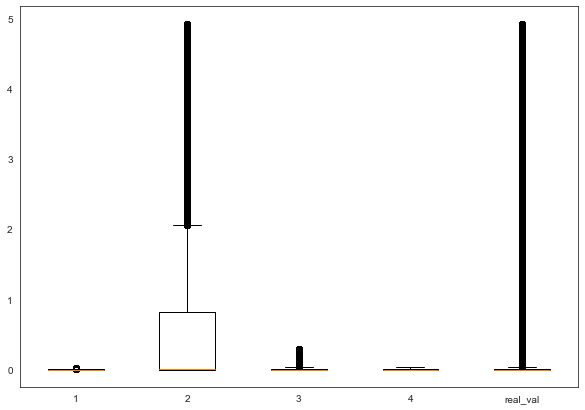

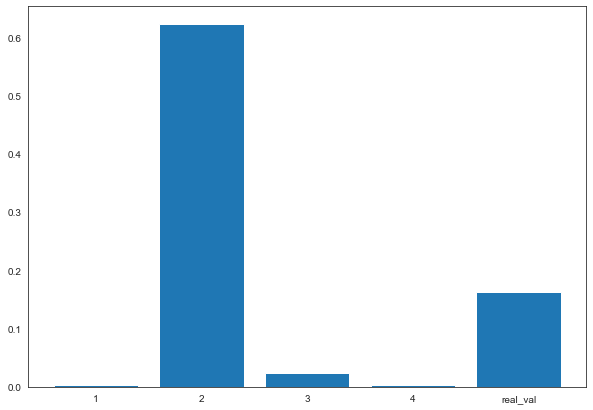

In [34]:
fig = plt.figure(figsize=(10,7))
plt.boxplot([ndf[ndf['dr']==1]['real_val'], ndf[ndf['dr']==2]['real_val'], 
             ndf[ndf['dr']==3]['real_val'], ndf[ndf['dr']==4]['real_val'], 
             ndf['real_val']], labels= ['1', '2', '3', '4', 'real_val'])
plt.show()

#----------------------------------------------------------------------------------------------------------------

fig = plt.figure(figsize=(10,7))
plt.bar(['1', '2', '3', '4', 'real_val'],
        [ndf[ndf['dr']==1]['real_val'].mean(), ndf[ndf['dr']==2]['real_val'].mean(), 
         ndf[ndf['dr']==3]['real_val'].mean(), ndf[ndf['dr']==4]['real_val'].mean(), 
         ndf['real_val'].mean()])
plt.show()

In [35]:
ndf['dr'] = ndf['dr'].replace(4, 1)
ndf['dr'].unique()

[3, 1, 2]
Categories (3, int64): [1, 2, 3]

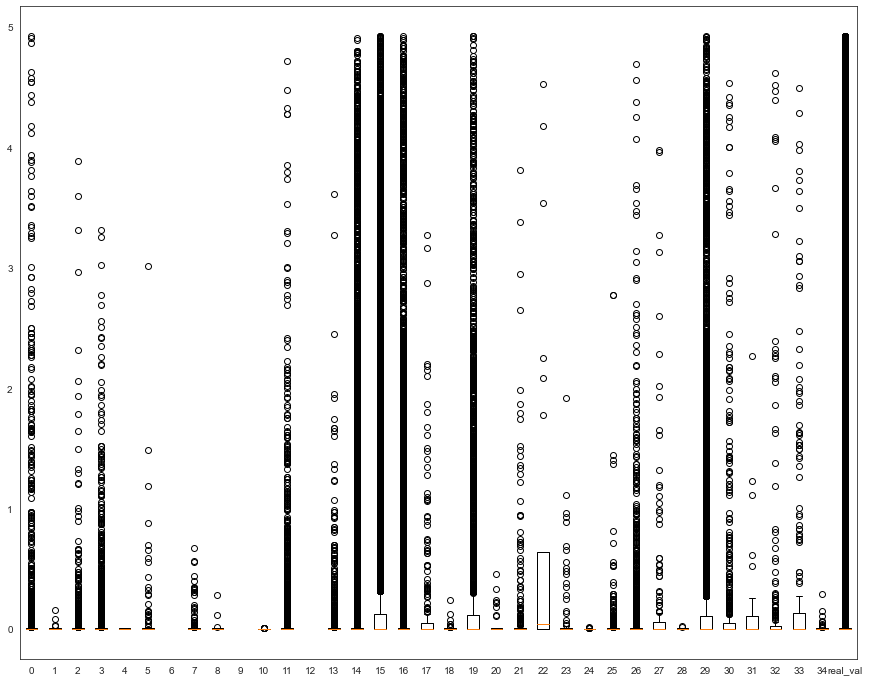

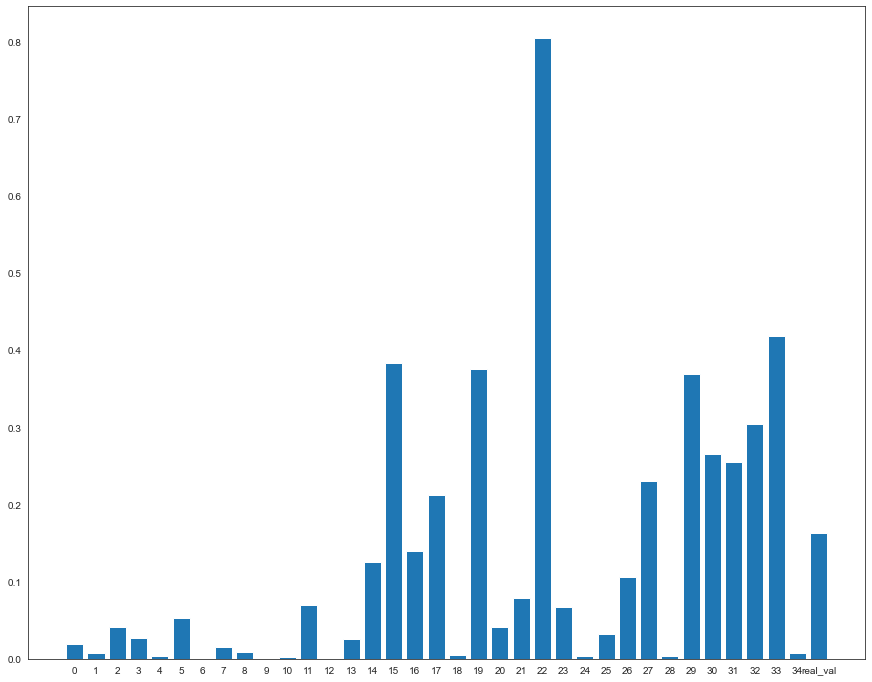

In [36]:
fig = plt.figure(figsize=(15,12))
plt.boxplot([ndf[ndf['weather_categories']==0]['real_val'], ndf[ndf['weather_categories']==1]['real_val'], 
             ndf[ndf['weather_categories']==2]['real_val'], ndf[ndf['weather_categories']==3]['real_val'], 
             ndf[ndf['weather_categories']==4]['real_val'], ndf[ndf['weather_categories']==5]['real_val'], 
             ndf[ndf['weather_categories']==6]['real_val'], ndf[ndf['weather_categories']==7]['real_val'], 
             ndf[ndf['weather_categories']==8]['real_val'], ndf[ndf['weather_categories']==9]['real_val'], 
             ndf[ndf['weather_categories']==10]['real_val'], ndf[ndf['weather_categories']==11]['real_val'], 
             ndf[ndf['weather_categories']==12]['real_val'], ndf[ndf['weather_categories']==13]['real_val'], 
             ndf[ndf['weather_categories']==14]['real_val'], ndf[ndf['weather_categories']==15]['real_val'], 
             ndf[ndf['weather_categories']==16]['real_val'], ndf[ndf['weather_categories']==17]['real_val'], 
             ndf[ndf['weather_categories']==18]['real_val'], ndf[ndf['weather_categories']==19]['real_val'], 
             ndf[ndf['weather_categories']==20]['real_val'], ndf[ndf['weather_categories']==21]['real_val'], 
             ndf[ndf['weather_categories']==22]['real_val'], ndf[ndf['weather_categories']==23]['real_val'], 
             ndf[ndf['weather_categories']==24]['real_val'], ndf[ndf['weather_categories']==25]['real_val'], 
             ndf[ndf['weather_categories']==26]['real_val'], ndf[ndf['weather_categories']==27]['real_val'], 
             ndf[ndf['weather_categories']==28]['real_val'], ndf[ndf['weather_categories']==29]['real_val'], 
             ndf[ndf['weather_categories']==30]['real_val'], ndf[ndf['weather_categories']==31]['real_val'], 
             ndf[ndf['weather_categories']==32]['real_val'], ndf[ndf['weather_categories']==33]['real_val'], 
             ndf[ndf['weather_categories']==34]['real_val'],
             ndf['real_val']], labels= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 
                                        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', 
                                        '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', 'real_val'])
plt.show()

#----------------------------------------------------------------------------------------------------------------

fig = plt.figure(figsize=(15,12))
plt.bar(
    ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 
                                    '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', 
                                    '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', 'real_val'],
    [ndf[ndf['weather_categories']==0]['real_val'].mean(), ndf[ndf['weather_categories']==1]['real_val'].mean(), 
     ndf[ndf['weather_categories']==2]['real_val'].mean(), ndf[ndf['weather_categories']==3]['real_val'].mean(), 
     ndf[ndf['weather_categories']==4]['real_val'].mean(), ndf[ndf['weather_categories']==5]['real_val'].mean(), 
     ndf[ndf['weather_categories']==6]['real_val'].mean(), ndf[ndf['weather_categories']==7]['real_val'].mean(), 
     ndf[ndf['weather_categories']==8]['real_val'].mean(), ndf[ndf['weather_categories']==9]['real_val'].mean(), 
     ndf[ndf['weather_categories']==10]['real_val'].mean(), ndf[ndf['weather_categories']==11]['real_val'].mean(), 
     ndf[ndf['weather_categories']==12]['real_val'].mean(), ndf[ndf['weather_categories']==13]['real_val'].mean(), 
     ndf[ndf['weather_categories']==14]['real_val'].mean(), ndf[ndf['weather_categories']==15]['real_val'].mean(), 
     ndf[ndf['weather_categories']==16]['real_val'].mean(), ndf[ndf['weather_categories']==17]['real_val'].mean(), 
     ndf[ndf['weather_categories']==18]['real_val'].mean(), ndf[ndf['weather_categories']==19]['real_val'].mean(), 
     ndf[ndf['weather_categories']==20]['real_val'].mean(), ndf[ndf['weather_categories']==21]['real_val'].mean(), 
     ndf[ndf['weather_categories']==22]['real_val'].mean(), ndf[ndf['weather_categories']==23]['real_val'].mean(), 
     ndf[ndf['weather_categories']==24]['real_val'].mean(), ndf[ndf['weather_categories']==25]['real_val'].mean(), 
     ndf[ndf['weather_categories']==26]['real_val'].mean(), ndf[ndf['weather_categories']==27]['real_val'].mean(), 
     ndf[ndf['weather_categories']==28]['real_val'].mean(), ndf[ndf['weather_categories']==29]['real_val'].mean(), 
     ndf[ndf['weather_categories']==30]['real_val'].mean(), ndf[ndf['weather_categories']==31]['real_val'].mean(), 
     ndf[ndf['weather_categories']==32]['real_val'].mean(), ndf[ndf['weather_categories']==33]['real_val'].mean(), 
     ndf[ndf['weather_categories']==34]['real_val'].mean(),
     ndf['real_val'].mean()])
plt.show()

In [37]:
ndf['weather_categories'] = ndf['weather_categories'].replace([9,12], 6)
ndf['weather_categories'] = ndf['weather_categories'].replace([8,34], 1)
ndf['weather_categories'] = ndf['weather_categories'].replace([18,24,28], 4)
ndf['weather_categories'] = ndf['weather_categories'].replace([20,25], 2)
ndf['weather_categories'] = ndf['weather_categories'].replace([19,29], 15)
ndf['weather_categories'] = ndf['weather_categories'].replace(13, 3)
ndf['weather_categories'].unique()

array([ 3., 14., 11.,  0., 15., 16.,  1., 26., 17.,  2.,  4., 27., 30.,
       32., 21., 23., 33.,  7.,  5., 22., 31., 10.])

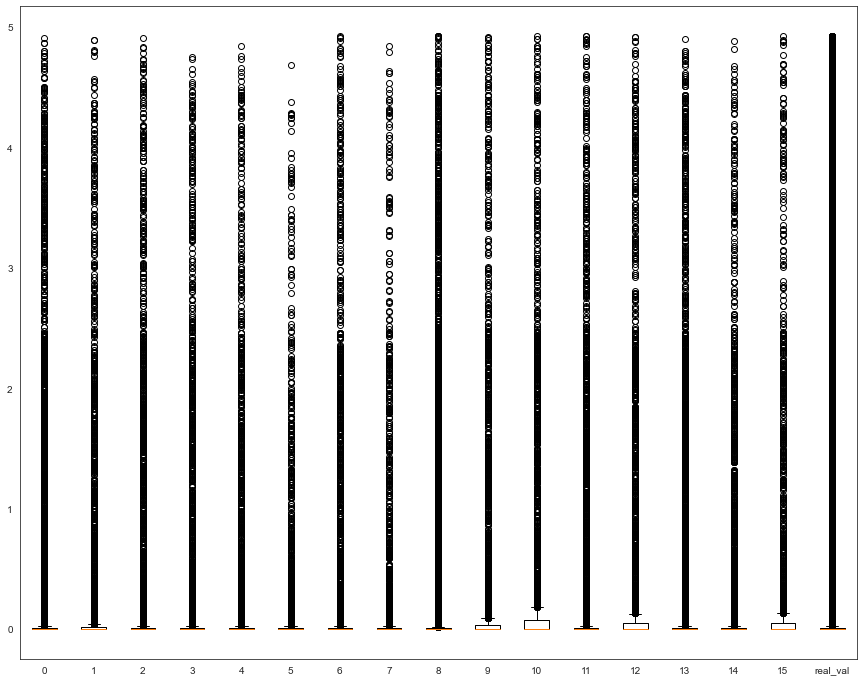

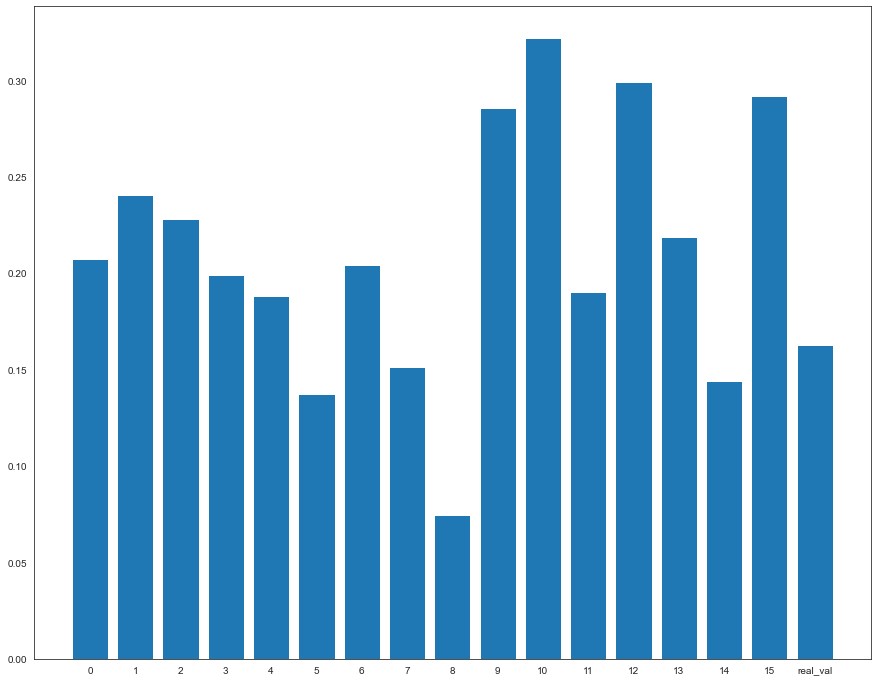

In [38]:
fig = plt.figure(figsize=(15,12))
plt.boxplot([ndf[ndf['wind_dir_0']==1]['real_val'], ndf[ndf['wind_dir_1']==1]['real_val'], 
             ndf[ndf['wind_dir_2']==1]['real_val'], ndf[ndf['wind_dir_3']==1]['real_val'], 
             ndf[ndf['wind_dir_4']==1]['real_val'], ndf[ndf['wind_dir_5']==1]['real_val'], 
             ndf[ndf['wind_dir_6']==1]['real_val'], ndf[ndf['wind_dir_7']==1]['real_val'], 
             ndf[ndf['wind_dir_8']==1]['real_val'], ndf[ndf['wind_dir_9']==1]['real_val'], 
             ndf[ndf['wind_dir_10']==1]['real_val'], ndf[ndf['wind_dir_11']==1]['real_val'], 
             ndf[ndf['wind_dir_12']==1]['real_val'], ndf[ndf['wind_dir_13']==1]['real_val'], 
             ndf[ndf['wind_dir_14']==1]['real_val'], ndf[ndf['wind_dir_15']==1]['real_val'], 
             ndf['real_val']], labels= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 
                                        '13', '14', '15', 'real_val'])
plt.show()

#----------------------------------------------------------------------------------------------------------------

fig = plt.figure(figsize=(15,12))
plt.bar(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 
         '13', '14', '15', 'real_val'],
        [ndf[ndf['wind_dir_0']==1]['real_val'].mean(), ndf[ndf['wind_dir_1']==1]['real_val'].mean(), 
         ndf[ndf['wind_dir_2']==1]['real_val'].mean(), ndf[ndf['wind_dir_3']==1]['real_val'].mean(), 
         ndf[ndf['wind_dir_4']==1]['real_val'].mean(), ndf[ndf['wind_dir_5']==1]['real_val'].mean(), 
         ndf[ndf['wind_dir_6']==1]['real_val'].mean(), ndf[ndf['wind_dir_7']==1]['real_val'].mean(), 
         ndf[ndf['wind_dir_8']==1]['real_val'].mean(), ndf[ndf['wind_dir_9']==1]['real_val'].mean(), 
         ndf[ndf['wind_dir_10']==1]['real_val'].mean(), ndf[ndf['wind_dir_11']==1]['real_val'].mean(), 
         ndf[ndf['wind_dir_12']==1]['real_val'].mean(), ndf[ndf['wind_dir_13']==1]['real_val'].mean(), 
         ndf[ndf['wind_dir_14']==1]['real_val'].mean(), ndf[ndf['wind_dir_15']==1]['real_val'].mean(), 
         ndf['real_val'].mean()])
plt.show()

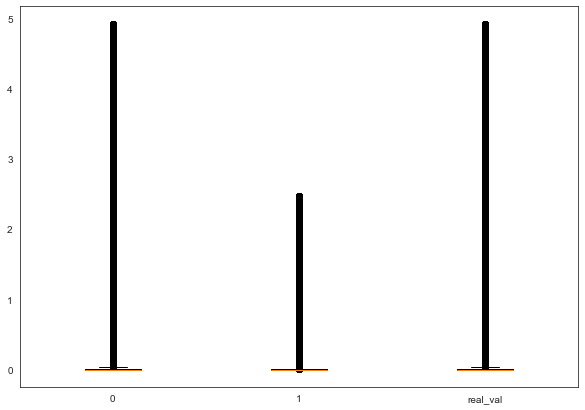

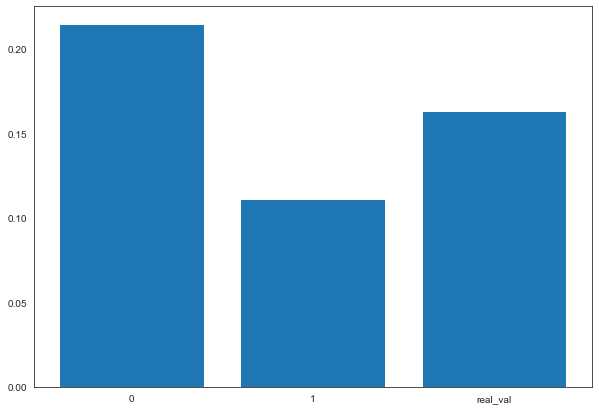

In [39]:
fig = plt.figure(figsize=(10,7))
plt.boxplot([ndf[ndf['idfiders_0']==1]['real_val'], ndf[ndf['idfiders_1']==1]['real_val'], 
             ndf['real_val']], labels= ['0', '1', 'real_val'])
plt.show()

#----------------------------------------------------------------------------------------------------------------

fig = plt.figure(figsize=(10,7))
plt.bar(['0', '1', 'real_val'],
        [ndf[ndf['idfiders_0']==1]['real_val'].mean(), ndf[ndf['idfiders_1']==1]['real_val'].mean(), 
         ndf['real_val'].mean()])
plt.show()

### Corrolation between the x columns

In [40]:
df_for_corr = ndf.drop(['real_val'], axis = 1)
corr_df = df_for_corr.corr(method="spearman")
corr_df

,ind,temp,wind_speed,humidity,wind_dir_categories,wind_dir_0,wind_dir_1,wind_dir_2,wind_dir_3,wind_dir_4,...,weather_31,weather_32,weather_33,weather_34,dr_0,dr_1,dr_2,dr_3,idfiders_0,idfiders_1
ind,1.000000,0.186071,0.246182,-0.363949,0.015586,0.042774,0.034393,0.011250,0.041841,0.032266,...,0.016179,0.017069,0.025567,-0.000520,0.000000,0.000000,0.000000,0.000000,0.000133,-0.000133
temp,0.186071,1.000000,0.083991,-0.532341,0.038066,-0.040629,-0.007874,0.011000,0.049374,0.026309,...,0.014206,0.053687,0.047331,0.034723,0.000000,0.000000,0.000000,0.000000,-0.000206,0.000206
wind_speed,0.246182,0.083991,1.000000,-0.366677,-0.030285,0.181579,0.118585,0.108034,0.117686,0.133673,...,0.004489,0.006383,-0.001245,-0.013386,0.000000,0.000000,0.000000,0.000000,-0.000003,0.000003
humidity,-0.363949,-0.532341,-0.366677,1.000000,-0.090481,0.006420,-0.029630,-0.039601,-0.034726,-0.038314,...,0.016637,-0.016397,-0.016970,0.001246,0.000000,0.000000,0.000000,0.000000,0.000100,-0.000100
wind_dir_categories,0.015586,0.038066,-0.030285,-0.090481,1.000000,-0.475917,-0.267060,-0.276984,-0.245438,-0.203235,...,-0.021446,-0.013206,-0.006535,-0.009519,0.000000,0.000000,0.000000,0.000000,0.000138,-0.000138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dr_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.333333,1.000000,-0.333333,-0.333333,0.000000,0.000000
dr_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.333333,-0.333333,1.000000,-0.333333,0.000000,0.000000
dr_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.333333,-0.333333,-0.333333,1.000000,0.000000,0.000000
idfiders_0,0.000133,-0.000206,-0.000003,0.000100,0.000138,-0.000050,-0.000032,-0.000036,-0.000036,-0.000034,...,-0.000002,-0.000007,-0.000007,-0.000005,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000


In [41]:
for col in corr_df.columns:
    l=list(corr_df[abs(corr_df[col])>=0.4].index)
    if len(l)>1:
        print("for ", col, ":")
        l.remove(col)
        print(l)

for  temp :
['humidity']
for  wind_speed :
['wind_dir_8']
for  humidity :
['temp']
for  wind_dir_categories :
['wind_dir_0']
for  wind_dir_0 :
['wind_dir_categories']
for  wind_dir_8 :
['wind_speed']
for  weather_categories :
['weather_0', 'weather_16']
for  weather_0 :
['weather_categories']
for  weather_16 :
['weather_categories']
for  idfiders_0 :
['idfiders_1']
for  idfiders_1 :
['idfiders_0']


If the correlation between two Explanatory Variable then we can drop one off them.
According to the correlation table all of the above have high correlation. so we will drop some of them.

In [55]:
final_df = ndf[['idfiders', 'ind', 'dr', 'real_val', 'weather_categories', 'wind_dir_0', 'wind_dir_1', 'wind_dir_2', 
                'wind_dir_3', 'wind_dir_4', 'wind_dir_5', 'wind_dir_6', 'wind_dir_7', 'wind_dir_8', 'wind_dir_9',
                'wind_dir_10', 'wind_dir_11', 'wind_dir_12', 'wind_dir_13',
                'wind_dir_14', 'wind_dir_15', 'wind_speed', 'temp']] #'humidity'
#final_df = ndf[['idfiders', 'ind', 'dr', 'real_val', 'weather_categories', 'wind_dir_categories', 'wind_speed', 'temp']] #'humidity'
final_df.describe()

,ind,real_val,weather_categories,wind_dir_0,wind_dir_1,wind_dir_2,wind_dir_3,wind_dir_4,wind_dir_5,wind_dir_6,...,wind_dir_8,wind_dir_9,wind_dir_10,wind_dir_11,wind_dir_12,wind_dir_13,wind_dir_14,wind_dir_15,wind_speed,temp
count,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.00000,...,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000,140488.000000
mean,9.124737,0.162917,11.690593,0.077615,0.033085,0.042879,0.043164,0.038950,0.027618,0.04305,...,0.368743,0.029953,0.031006,0.058026,0.034508,0.069757,0.050851,0.020158,3.181937,10.021496
std,6.697988,0.600346,6.486825,0.267566,0.178858,0.202585,0.203226,0.193476,0.163876,0.20297,...,0.482466,0.170458,0.173335,0.233794,0.182531,0.254738,0.219695,0.140542,2.833835,11.021208
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000
25%,2.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,9.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10.000000
75%,13.000000,0.012000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,18.000000
max,21.000000,4.926000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,38.000000


In [56]:
final_df

,idfiders,ind,dr,real_val,weather_categories,wind_dir_0,wind_dir_1,wind_dir_2,wind_dir_3,wind_dir_4,...,wind_dir_8,wind_dir_9,wind_dir_10,wind_dir_11,wind_dir_12,wind_dir_13,wind_dir_14,wind_dir_15,wind_speed,temp
0,1,1,3,0.0000,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,3,0.0022,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,0.0033,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,1,0.0000,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,1,2,0.0000,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140483,1,1,2,0.0000,14.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0
140484,3,1,2,0.0000,14.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0
140485,1,1,1,0.0120,14.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0
140486,1,1,3,0.0000,14.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0


## Linear regression

In [57]:
from sklearn.linear_model import LinearRegression

       Actual  Predicted
0       0.000   0.244651
1       0.000  -0.004434
2       4.008   0.481299
3       0.000   0.039581
4       0.000   0.223071
...       ...        ...
28093   0.000   0.121802
28094   0.006   0.067877
28095   0.000  -0.009611
28096   1.540   0.427536
28097   0.000   0.310164

[28098 rows x 2 columns]
Mean Absolute Error: 0.2797111153652032
Mean Squared Error: 0.33585405984361644
Root Mean Squared Error: 0.5795291708306118
R2 score Error: 0.07261816248813857


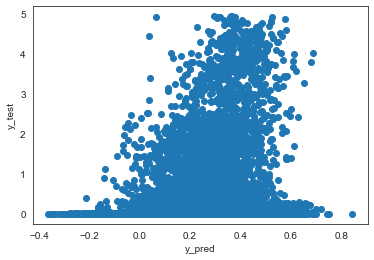

In [58]:
X = final_df.drop(['real_val'], axis = 1)
y = final_df['real_val'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

y_pred = regressor.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(results_df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score Error:', metrics.r2_score(y_test, y_pred))

plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor

       Actual  Predicted
0       0.000      0.000
1       0.000      0.000
2       4.008      4.308
3       0.000      0.002
4       0.000      0.000
...       ...        ...
28093   0.000      0.000
28094   0.006      0.012
28095   0.000      0.000
28096   1.540      1.760
28097   0.000      0.000

[28098 rows x 2 columns]
Mean Absolute Error: 0.07217988536498321
Mean Squared Error: 0.09211251937615517
Root Mean Squared Error: 0.30350044378246827
R2 score Error: 0.7456529853571476


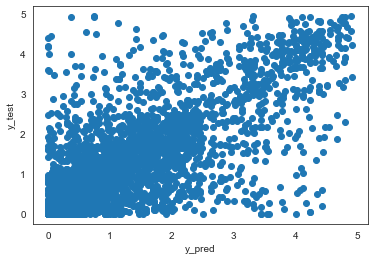

In [60]:
X = final_df.drop(['real_val'], axis = 1)
y = final_df['real_val'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train) #training the algorithm

y_pred = regressor.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(results_df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score Error:', metrics.r2_score(y_test, y_pred))

plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

## Lasso Regression

In [61]:
from sklearn import linear_model

       Actual  Predicted
0       0.000   0.293921
1       0.000   0.183845
2       4.008   0.345328
3       0.000   0.166436
4       0.000   0.049386
...       ...        ...
28093   0.000   0.181464
28094   0.006   0.093065
28095   0.000   0.124273
28096   1.540   0.390633
28097   0.000   0.135596

[28098 rows x 2 columns]
Mean Absolute Error: 0.2707442647546893
Mean Squared Error: 0.34385016793924394
Root Mean Squared Error: 0.5863873872613939
R2 score Error: 0.05053879437771758


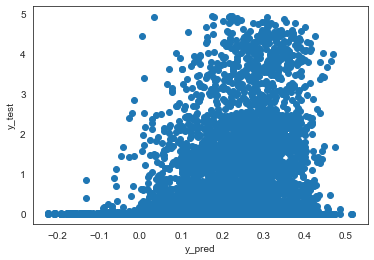

In [62]:
X = final_df.drop(['real_val'], axis = 1)
y = final_df['real_val'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = linear_model.Lasso(alpha=0.1)  
regressor.fit(X_train, y_train) #training the algorithm

y_pred = regressor.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(results_df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score Error:', metrics.r2_score(y_test, y_pred))

plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

## Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

Mean Absolute Error: 0.0622560891443446
Mean Squared Error: 0.05913860112967176
Root Mean Squared Error: 0.2431842945785598
R2 score Error: 0.8367026898258932


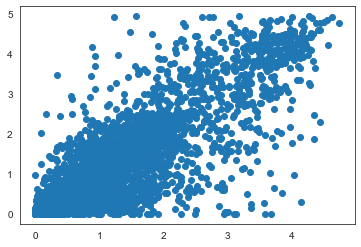

In [64]:
X = final_df.copy().drop(['real_val'],axis = 1)
y = final_df['real_val'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor()  
regressor.fit(X_train, y_train) #training the algorithm

y_pred = regressor.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score Error:', metrics.r2_score(y_test, y_pred))

plt.scatter(y_pred, y_test)
plt.show()

Mean Absolute Error: 0.025937543718185328
Mean Squared Error: 0.012065588544648622
Root Mean Squared Error: 0.10984347292692735
R2 score Error: 0.9664821479987263


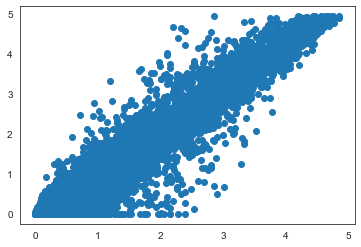

In [65]:
y_pred = regressor.predict(X_train)
results_df = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_pred.flatten()})

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('R2 score Error:', metrics.r2_score(y_train, y_pred))

plt.scatter(y_pred, y_train)
plt.show()

In [72]:
# cross validiation with kFold = 10
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
MAE, MSE, RMSE, r2_score = [], [], [], []
for train, test in kf.split(ndf):
    regressor = RandomForestRegressor()  
    regressor.fit(X_train, y_train) #training the algorithm
    
    y_pred = regressor.predict(X_test)
    results_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
    
    MAE.append(metrics.mean_absolute_error(y_test, y_pred))  
    MSE.append(metrics.mean_squared_error(y_test, y_pred))  
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    r2_score.append(metrics.r2_score(y_test, y_pred))

resultsDF = pd.DataFrame({'r2_score':r2_score, 'MAE': MAE, 'MSE': MSE, 'RMSE': RMSE})

In [73]:
resultsDF

,r2_score,MAE,MSE,RMSE
0,0.841274,0.061672,0.057483,0.239757
1,0.840083,0.061713,0.057914,0.240654
2,0.839448,0.061800,0.058145,0.241132
3,0.839565,0.061734,0.058102,0.241044
4,0.838819,0.061673,0.058372,0.241603
5,0.840926,0.061537,0.057609,0.240019
6,0.841347,0.061450,0.057457,0.239701
7,0.839990,0.061612,0.057948,0.240724
8,0.839853,0.061725,0.057998,0.240827
9,0.840154,0.061814,0.057889,0.240600


## Support Vector Regression

In [53]:
from sklearn.svm import SVR

In [54]:
#X = final_df.drop(['real_val'], axis = 1)
#y = final_df['real_val'].values.reshape(-1,1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#
#regressor = SVR(C=1.0, epsilon=0.2) 
#regressor.fit(X_train, y_train) #training the algorithm
#
#y_pred = regressor.predict(X_test)
#results_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
#print(results_df)
#
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print('R2 score Error:', metrics.r2_score(y_test, y_pred))
#
#plt.scatter(y_pred, y_test)
#plt.xlabel('y_pred')
#plt.ylabel('y_test')
#plt.show()